# MINI PROJECT 2: STROKE PREDICTION 
This dataset is used to predict whether a patient is likely to get stroke 
based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


# IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

In [20]:
stroke = 'healthcare-dataset-stroke-data.csv'
df_stroke = pd.read_csv(stroke)

In [21]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df_stroke.shape

(5110, 12)

In [22]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [23]:
df_stroke.drop("id",axis=1,inplace=True) #axis=1 is for column   

In [8]:
df_stroke.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,NaN,NaN,NaN,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6
smoking_status,5110,4,never smoked,1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN


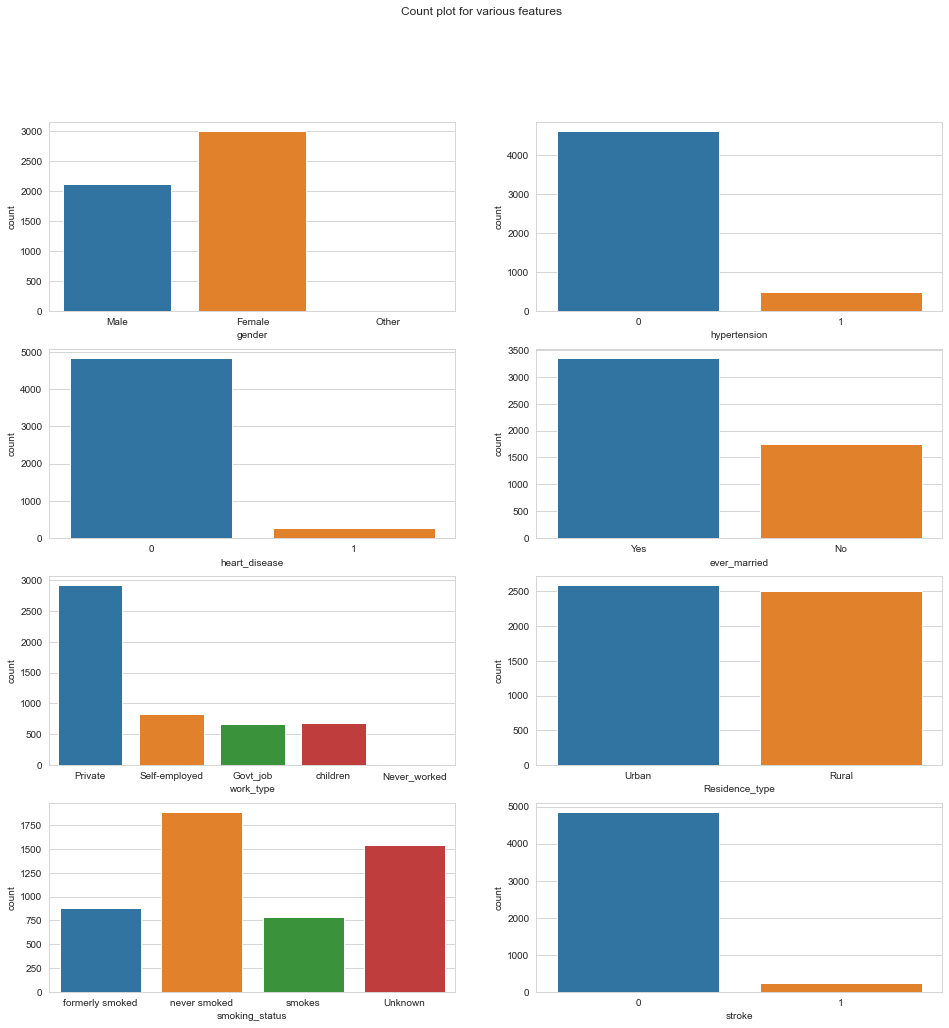

In [24]:
# OBSERVATION:  From research, Heart Disease and Hypertension have close links to stroke but somehow 
# this is not obvious from dataset.   Gender = "other could be a typo error"

# Plot an Initial View of Categorical Features

fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Count plot for various features")

sns.countplot(ax=axes[0,0],data=df_stroke,x='gender')
sns.countplot(ax=axes[0,1],data=df_stroke,x='hypertension')
sns.countplot(ax=axes[1,0],data=df_stroke,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df_stroke,x='ever_married')
sns.countplot(ax=axes[2,0],data=df_stroke,x='work_type')
sns.countplot(ax=axes[2,1],data=df_stroke,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df_stroke,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df_stroke,x='stroke')

plt.show()


<AxesSubplot:xlabel='age', ylabel='Density'>

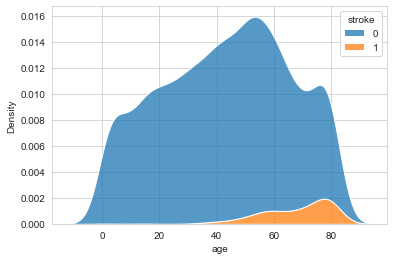

In [25]:
sns.kdeplot(data=df_stroke, x="age", hue="stroke", multiple="stack")

C:\Users\yeong\anaconda3\envs\IOD_9thMay2022\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


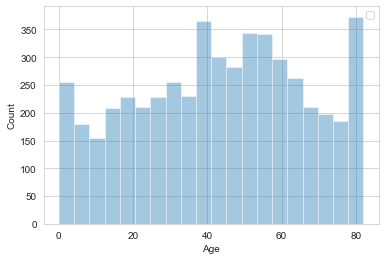

In [10]:
sns.distplot( df_stroke['age'], kde=False );
plt.legend(loc = 'upper right')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show();

In [11]:
#df_stroke['age'].plot(kind = 'box', figsize= (8,6) , title = 'box plot of age')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


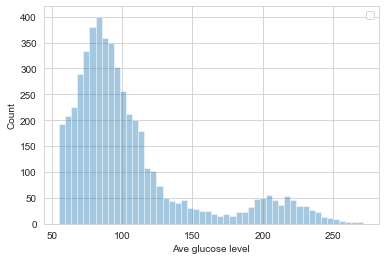

In [12]:
sns.distplot( df_stroke['avg_glucose_level'], kde=False );
plt.legend(loc = 'upper right')
plt.xlabel('Ave glucose level')
plt.ylabel('Count')
plt.show();

In [13]:
df_stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
df_stroke[df_stroke['gender']== 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [13]:
# OBSERVATION: There is one row with gender "other". This could be a typo error. Assumed it is a Male

mask= df_stroke['gender']== 'Other'
df_stroke.loc[mask, 'gender'] = 'Male'

In [15]:
df_stroke['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

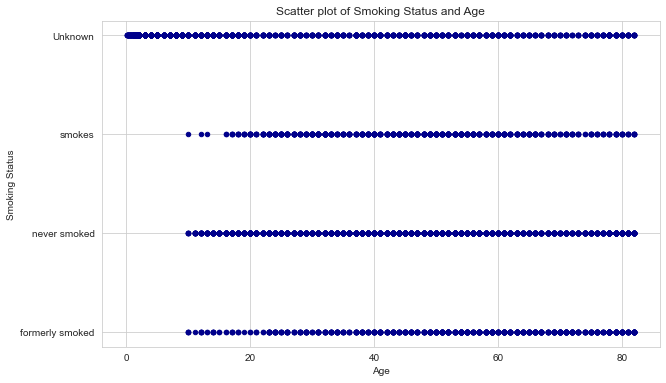

In [14]:
df_stroke.plot(kind='scatter', x='age', y='smoking_status', figsize=(10, 6), color='darkblue')

plt.title('Scatter plot of Smoking Status and Age')
plt.xlabel('Age')
plt.ylabel('Smoking Status')
plt.show()

In [16]:
# OBSERVATION: Children 10 years and below should be categorised as "NEVER SMOKED"

mask= df_stroke['age']<= 10
df_stroke.loc[mask, 'smoking_status'] = 'never smoked'

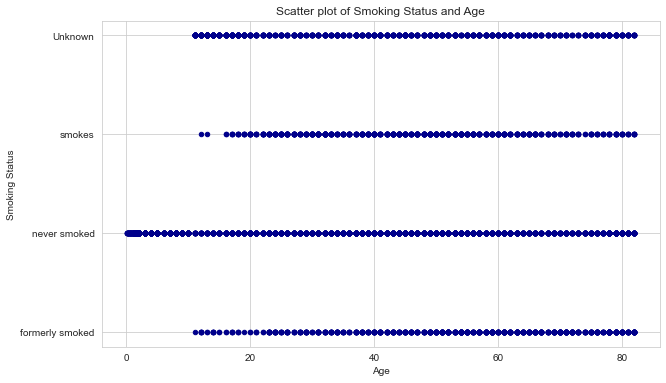

In [17]:
df_stroke.plot(kind='scatter', x='age', y='smoking_status', figsize=(10, 6), color='darkblue')

plt.title('Scatter plot of Smoking Status and Age')
plt.xlabel('Age')
plt.ylabel('Smoking Status')
plt.show()

# Children 10 years and below should be categorised as "NEVER SMOKED"

In [16]:
df_stroke['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [19]:
df_stroke['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [20]:
df_stroke['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [21]:
df_stroke.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
# Transform Gender, Ever_married and Residence_type to Numerical 

df_stroke = pd.read_csv(stroke, converters={'gender': lambda x: int(x == 'Male'), 'ever_married': lambda x: int(x == 'Yes'),
                                     'Residence_type': lambda x: int(x == 'Urban') })

# Gender =Male = 1, Female= 0,  Ever-married= yes is 1, no is 0, Residence type= Urban is 1, Rural is 0

In [18]:
# Convert categorical variables to dummy variables with 1 hot encoding

df = pd.get_dummies(data = df_stroke, columns = ['work_type', 'smoking_status'], 
                                      prefix = ['work', 'smoke'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,NaN,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0


In [24]:
df.drop("id",axis=1,inplace=True) #axis=1 is for column   

In [25]:
# AFTER ONE HOT ENCODING, DROP ONE FEATURE FROM "SMOKING_STATUS" (FROM 4 to 3), AND ONE FROM WORK_TYPE (FROM 5 to 4)

df.drop(["smoke_Unknown", "work_Govt_job"],axis=1,inplace=True) #axis=1 is for column  

In [26]:
# shift target column 'stroke' to last position
last_column = df.pop('stroke')
  
# insert column using insert(position,column_name,first_column) function
df.insert(0, 'stroke', last_column)

In [27]:
df[df['bmi'].isna()] 

,stroke,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_formerly smoked,smoke_never smoked,smoke_smokes
1,1,0,61.0,0,0,1,0,202.21,NaN,0,0,1,0,0,1,0
8,1,0,59.0,0,0,1,0,76.15,NaN,0,1,0,0,0,0,0
13,1,1,78.0,0,1,1,1,219.84,NaN,0,1,0,0,0,0,0
19,1,1,57.0,0,1,0,1,217.08,NaN,0,0,0,0,0,0,0
27,1,1,58.0,0,0,1,0,189.84,NaN,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,0,1,41.0,0,0,0,0,70.15,NaN,0,1,0,0,1,0,0
5048,0,1,40.0,0,0,1,1,191.15,NaN,0,1,0,0,0,0,1
5093,0,0,45.0,1,0,1,0,95.02,NaN,0,0,0,0,0,0,1
5099,0,1,40.0,0,0,1,0,83.94,NaN,0,1,0,0,0,0,1


In [28]:
# FILL MISSING VALUES IN BMI using KNNImputer

# creating series form weight column
gfg = pd.Series(df['bmi'])
  
# convert series to numpy array
new=gfg.to_numpy()

# reshape array
test=new.reshape(-1, 1)

# impute missing values in BMI
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights ='distance')
new = imputer.fit_transform(test)

df['bmi']= new

#Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature.
#https://scikit-learn.org/stable/modules/impute.html#knnimpute

In [29]:
df[df['bmi'].isna()] 

,stroke,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_formerly smoked,smoke_never smoked,smoke_smokes


In [30]:
df.head()

,stroke,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1,1,67.0,0,1,1,1,228.69,36.600000,0,1,0,0,1,0,0
1,1,0,61.0,0,0,1,0,202.21,28.893237,0,0,1,0,0,1,0
2,1,1,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,0,1,0
3,1,0,49.0,0,0,1,1,171.23,34.400000,0,1,0,0,0,0,1
4,1,0,79.0,1,0,1,0,174.12,24.000000,0,0,1,0,0,1,0


In [31]:
df.isnull().sum().sum()

0

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00
gender,5110.0,0.413894,0.492578,0.00,0.000,0.000,1.00,1.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
Residence_type,5110.0,0.508023,0.499985,0.00,0.000,1.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
work_Never_worked,5110.0,0.004305,0.065480,0.00,0.000,0.000,0.00,1.00


In [33]:
df.describe().T[['min', 'max']]

,min,max
stroke,0.00,1.00
gender,0.00,1.00
age,0.08,82.00
hypertension,0.00,1.00
heart_disease,0.00,1.00
ever_married,0.00,1.00
Residence_type,0.00,1.00
avg_glucose_level,55.12,271.74
bmi,10.30,97.60
work_Never_worked,0.00,1.00


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   stroke                 5110 non-null   int64  
 1   gender                 5110 non-null   int64  
 2   age                    5110 non-null   float64
 3   hypertension           5110 non-null   int64  
 4   heart_disease          5110 non-null   int64  
 5   ever_married           5110 non-null   int64  
 6   Residence_type         5110 non-null   int64  
 7   avg_glucose_level      5110 non-null   float64
 8   bmi                    5110 non-null   float64
 9   work_Never_worked      5110 non-null   uint8  
 10  work_Private           5110 non-null   uint8  
 11  work_Self-employed     5110 non-null   uint8  
 12  work_children          5110 non-null   uint8  
 13  smoke_formerly smoked  5110 non-null   uint8  
 14  smoke_never smoked     5110 non-null   uint8  
 15  smok

In [35]:
df.corr()

,stroke,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_formerly smoked,smoke_never smoked,smoke_smokes
stroke,1.000000,0.009117,0.245257,0.127904,0.134914,0.108340,0.015458,0.131945,0.038947,-0.014882,0.011888,0.062168,-0.083869,0.064556,-0.004129,0.008939
gender,0.009117,1.000000,-0.027623,0.021275,0.085717,-0.029936,-0.005937,0.054580,-0.025464,0.011496,-0.032639,-0.025971,0.089283,0.042738,-0.098813,0.011477
age,0.245257,-0.027623,1.000000,0.276398,0.263796,0.679125,0.014180,0.238171,0.325942,-0.078653,0.116534,0.327989,-0.634215,0.236897,0.119307,0.073133
hypertension,0.127904,0.021275,0.276398,1.000000,0.108306,0.164243,-0.007913,0.174474,0.160189,-0.021608,-0.005413,0.115442,-0.129506,0.058853,0.065063,0.031240
heart_disease,0.134914,0.085717,0.263796,0.108306,1.000000,0.114644,0.003092,0.161857,0.038899,-0.015712,0.000027,0.086760,-0.091634,0.066804,-0.021856,0.044049
ever_married,0.108340,-0.029936,0.679125,0.164243,0.114644,1.000000,0.006261,0.155068,0.335705,-0.090838,0.153830,0.192716,-0.544441,0.171256,0.102845,0.105226
Residence_type,0.015458,-0.005937,0.014180,-0.007913,0.003092,0.006261,1.000000,-0.004946,-0.000120,0.022859,-0.018173,0.010594,-0.002309,0.007654,-0.024466,0.027266
avg_glucose_level,0.131945,0.054580,0.238171,0.174474,0.161857,0.155068,-0.004946,1.000000,0.168751,-0.014675,0.016588,0.062694,-0.102250,0.068111,0.023885,0.017646
bmi,0.038947,-0.025464,0.325942,0.160189,0.038899,0.335705,-0.000120,0.168751,1.000000,-0.028600,0.203884,0.070822,-0.442843,0.104257,0.106220,0.085579
work_Never_worked,-0.014882,0.011496,-0.078653,-0.021608,-0.015712,-0.090838,0.022859,-0.014675,-0.028600,1.000000,-0.076081,-0.028728,-0.025915,-0.030095,0.036238,-0.028099


In [36]:
# Check correlation; to check for Predictor Variables based on Quality as Target variable
df.corr()['stroke'].sort_values()

work_children           -0.083869
work_Never_worked       -0.014882
smoke_never smoked      -0.004129
smoke_smokes             0.008939
gender                   0.009117
work_Private             0.011888
Residence_type           0.015458
bmi                      0.038947
work_Self-employed       0.062168
smoke_formerly smoked    0.064556
ever_married             0.108340
hypertension             0.127904
avg_glucose_level        0.131945
heart_disease            0.134914
age                      0.245257
stroke                   1.000000
Name: stroke, dtype: float64

C:\Users\yeong\AppData\Local\Temp\ipykernel_9516\2358579485.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


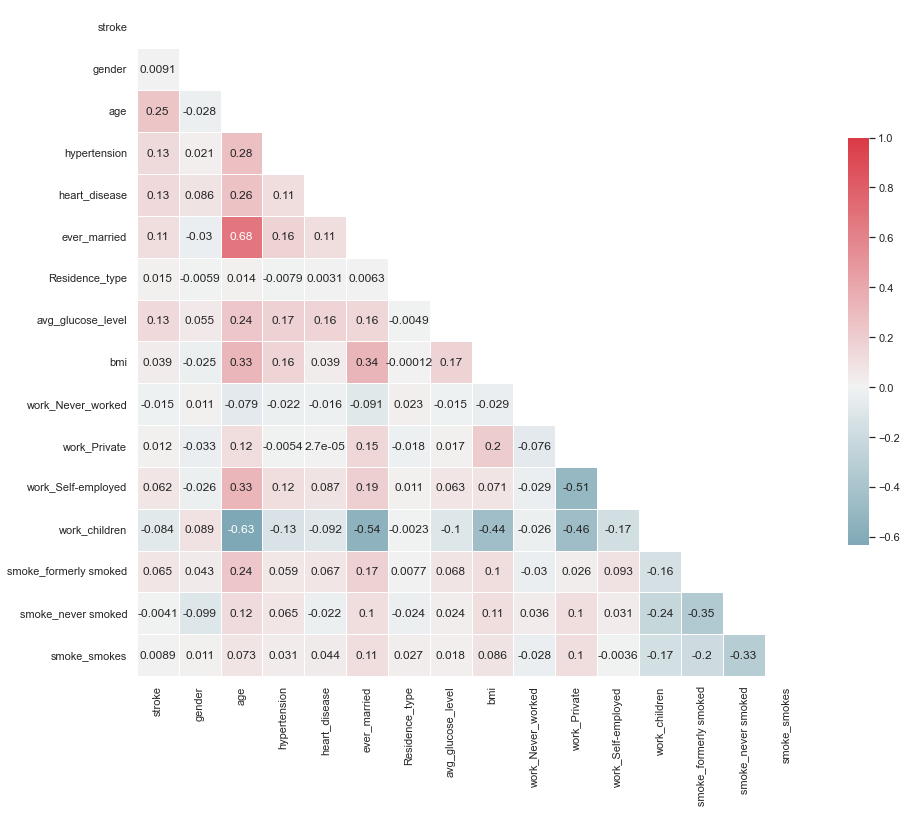

In [37]:
# Copied code from seaborn examples: another good way to show Correlation
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [38]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00
gender,5110.0,0.413894,0.492578,0.00,0.000,0.000,1.00,1.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
Residence_type,5110.0,0.508023,0.499985,0.00,0.000,1.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
work_Never_worked,5110.0,0.004305,0.065480,0.00,0.000,0.000,0.00,1.00


In [39]:
def facetgridplot(data, var):
    facet = sns.FacetGrid(data, hue="stroke", aspect=3)
    facet.map(sns.kdeplot, var, shade= True)
    facet.set(xlim=(0, data[var].max()))
    facet.add_legend()
    plt.show();

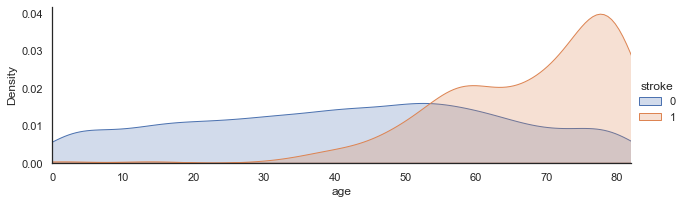

In [40]:
# OBSERVATION: The older a person is, the higher the risk of stroke

facetgridplot(df_stroke, 'age')

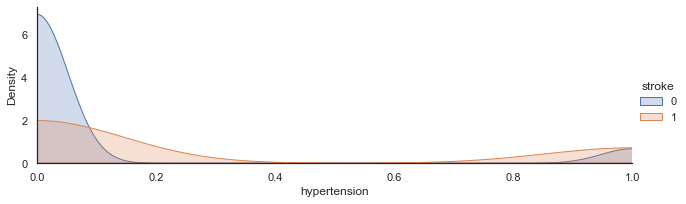

In [41]:
# OBSERVATION: Research has shown that Hypertension is a major cause for stroke but dataset does not show this clearly

facetgridplot(df, 'hypertension')

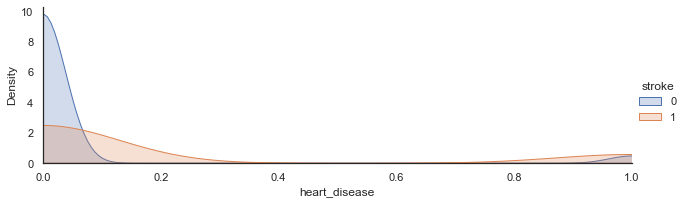

In [42]:
# OBSERVATION: Research has shown that Heart Disease is a major cause for stroke but dataset does not show this clearly

facetgridplot(df, 'heart_disease')

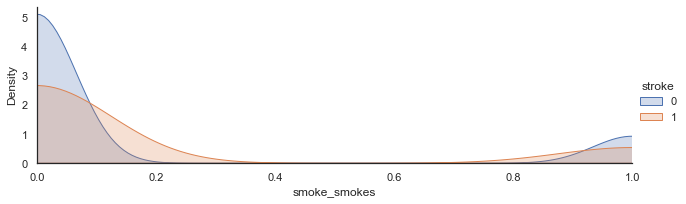

In [43]:
# OBSERVATION: Research has shown that SMOKING is a major cause for stroke but dataset does not show this clearly

facetgridplot(df, 'smoke_smokes')

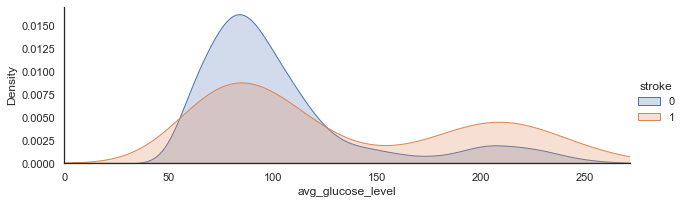

In [44]:
# OBSERVATION: Higher glucose level damages blood cells and increases stroke as shown

facetgridplot(df, 'avg_glucose_level')

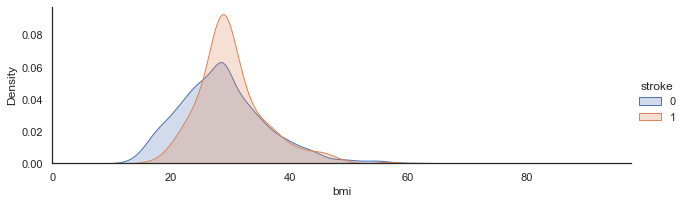

In [45]:
#OBSERVATION:  BMI is linked to stroke esp in the 30's range

facetgridplot(df, 'bmi')

In [46]:
def bar_chart(data, feature):
    strokepositive = data[data['stroke']==1][feature].value_counts(normalize=True)*100
    strokenegative = data[data['stroke']==0][feature].value_counts(normalize=True)*100
    df = pd.DataFrame([strokepositive,strokenegative])
    df.index = ['Stroke','No Stroke']
    df.plot(kind='bar',stacked=True, figsize=(10,5));

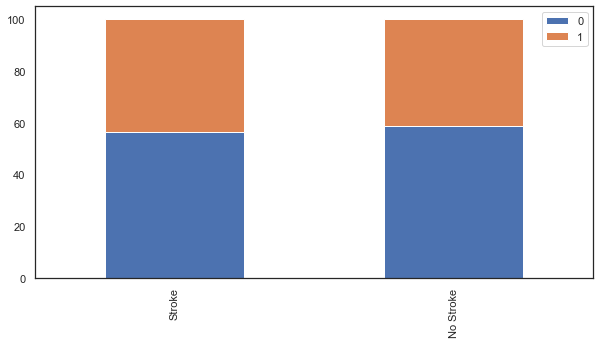

In [47]:
# OBSERVATION:  Both Male and Female are at equal risk to stroke

bar_chart(df, 'gender')

<AxesSubplot:xlabel='stroke', ylabel='count'>

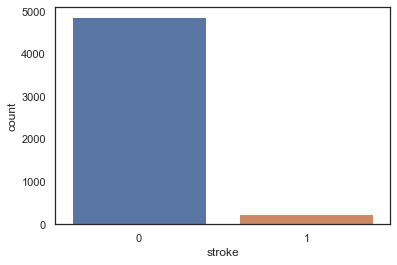

In [48]:
# OBSERVATION:  Stroke data imbalanced

df['stroke'].value_counts(normalize= True)  #normalise makes it into a percentage

sns.countplot(x='stroke', data=df)


In [49]:
predictor_columns = [c for c in df.columns if c != 'stroke']

# Load the dataset as a pandas data frame
X = pd.DataFrame(df, columns = predictor_columns)
y = df['stroke']

# USE SCIKIT LEARN RFE TO SELECT X TOP FEATURES
from sklearn.feature_selection import RFE
estimator = LogisticRegression(solver='liblinear', random_state=0)
selector = RFE(estimator, n_features_to_select= 9, step=1 )
selector = selector.fit(X, y)

#selector.support_
print(selector.ranking_)
print(selector.support_)
print(selector.feature_names_in_)

cols = selector.get_support(indices=True)
X = df.iloc[:,cols]
print(X)

[5 1 1 1 1 1 6 3 1 2 1 1 4 1 7]
[False  True  True  True  True  True False False  True False  True  True
 False  True False]
['gender' 'age' 'hypertension' 'heart_disease' 'ever_married'
 'Residence_type' 'avg_glucose_level' 'bmi' 'work_Never_worked'
 'work_Private' 'work_Self-employed' 'work_children'
 'smoke_formerly smoked' 'smoke_never smoked' 'smoke_smokes']
      gender   age  hypertension  heart_disease  ever_married        bmi  \
0          1  67.0             0              1             1  36.600000   
1          0  61.0             0              0             1  28.893237   
2          1  80.0             0              1             1  32.500000   
3          0  49.0             0              0             1  34.400000   
4          0  79.0             1              0             1  24.000000   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1  28.893237   
5106       0  81.0        

In [64]:
# TAKE ALL COLUMNS EXCEPT TARGETT AS PREDICTOR COLUMNS
predictor_columns = [c for c in df.columns if c != 'stroke']
#predictor_columns = [ 'age', 'heart_disease', 'avg_glucose_level', 'hypertension', 'ever_married', 
#                   'smoke_formerly smoked', 'work_Self-employed', 'work_Private', 'gender', 'bmi']

# LOAD DATA SET AS DATAFRAME
X = pd.DataFrame(df, columns = predictor_columns)
y = df['stroke']

# SPLIT DATA INTO TRAINING AND TEST DATA 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=None, stratify=y, random_state=0) # default test_size is 0.25
#stratify ensures the same proportion of classes in both training and test dataset

# STANDARDISE TRAINING DATA  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# FIT on training set only.
scaler.fit(X_train)

# APPLY TRANSFORM to both the training set AND the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# HANDLE IMBALANCED TRAINING DATA
from imblearn.over_sampling import SMOTE 
model = SMOTE(random_state=42)
X_train, y_train = model.fit_resample(X_train, y_train)  # this gives the Resampled X and Y-training data

In [65]:
print(len(X_train), len(X_test))

7290 1278


In [52]:
# Training Data is now balanced

y_train.value_counts(normalize= True)  


0    0.5
1    0.5
Name: stroke, dtype: float64

In [66]:
# Check that test data remains unbalanced 

y_test.value_counts(normalize= True)  

0    0.951487
1    0.048513
Name: stroke, dtype: float64

In [54]:
X_train.shape

(7290, 15)

# MACHINE LEARNING

### 1. LOGISTICS REGRESSION

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

model_lr = LogisticRegression(solver='liblinear', random_state=0) 
model_lr.fit(X_train, y_train)   
y_predict= model_lr.predict(X_test) 
model_lr.predict_proba(X_test)  

score_lr  = model_lr.score(X_test, y_test) 
score2_lr = model_lr.score(X_train,y_train) 
score_lrtest= round(score_lr,5)
print(f'Score for Test Data      {round(score_lr,5)}')
print(f'Score for Training Data  {round(score2_lr,5)}')


# use Cross Validation on Training Data
from sklearn.model_selection import cross_val_score 
from sklearn import metrics
score2_lrcv = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='f1_macro')  
print("Score for Training Data from CV is %0.2f with a standard deviation of %0.2f" % (score2_lrcv.mean(), score2_lrcv.std())) 
print(round(score2_lrcv.mean(),5))

Score for Test Data      0.74883
Score for Training Data  0.79753
Score for Training Data from CV is 0.80 with a standard deviation of 0.00
0.79676


In [68]:
# F1 score for stroke is low, low recall and high precision

print(classification_report(y_predict,y_test)) 

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       931
           1       0.71      0.13      0.22       347

    accuracy                           0.75      1278
   macro avg       0.73      0.55      0.53      1278
weighted avg       0.74      0.75      0.68      1278



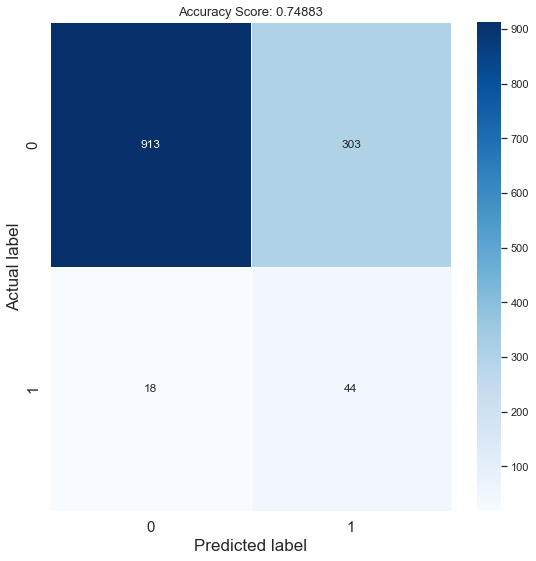

In [57]:
cm = metrics.confusion_matrix(y_test, model_lr.predict(X_test))
plt.figure(figsize=(9,9)) #print out seaborn heatmap of Confusion matrix
sns.heatmap(cm,annot=True,fmt="d", cmap="Blues", linewidths= 1);
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score_lrtest), size = 13);
plt.tick_params(labelsize= 15)

### SUPPORT VECTOR MACHINE

In [69]:
from sklearn import svm

model_svm = svm.SVC(kernel='linear', C=1,probability=True) 
svc= model_svm.fit(X_train, y_train) 
 
y_predict= model_svm.predict(X_test) 
model_svm.predict_proba(X_test)  

score_svm= model_svm.score(X_test, y_test) # all classification models use ACCURACY as score
score2_svm = model_svm.score(X_train,y_train) # do a score based on training so you can compare score from Train and Test to check overfitting.
score_svmtest= round(score_svm,5)
print(f'Score for Test Data      {score_svmtest}')
print(f'Score for Training Data  {round(score2_svm,5)}')

# use Cross Validation always on TRAINING DATA
from sklearn.model_selection import cross_val_score 
score_svmcv = cross_val_score(model_svm, X_train, y_train, cv=5, scoring='f1_macro')  # default scoring of the test data = Accuracy but you can change to other parameters
print("%0.2f Accuracy of Training Data with a standard deviation of %0.2f" % (score_svmcv.mean(), score_svmcv.std())) # mean score and std deviation of score

Score for Test Data      0.73787
Score for Training Data  0.80055
0.80 Accuracy of Training Data with a standard deviation of 0.00


In [72]:
# F1 score low as well, low Recall, High Precision

print(classification_report(y_predict,y_test)) 

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       913
           1       0.74      0.13      0.22       365

    accuracy                           0.74      1278
   macro avg       0.74      0.55      0.53      1278
weighted avg       0.74      0.74      0.66      1278



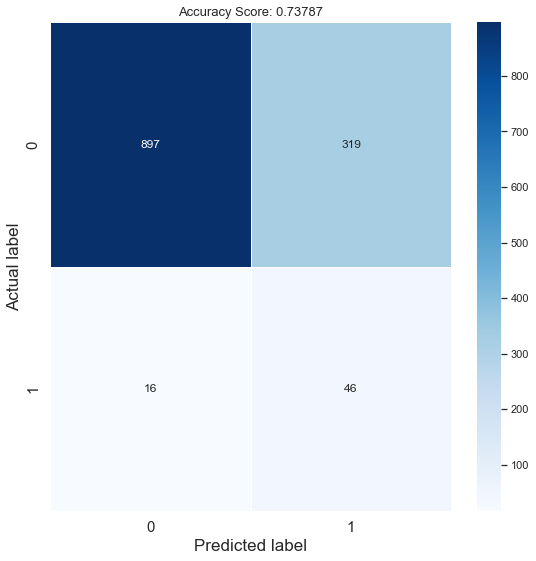

In [73]:
cm = metrics.confusion_matrix(y_test, model_svm.predict(X_test))
plt.figure(figsize=(9,9)) #print out seaborn heatmap of Confusion matrix
sns.heatmap(cm,annot=True,fmt="d", cmap="Blues", linewidths= 1);
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score_svmtest), size = 13);
plt.tick_params(labelsize= 15)

### NAIVE BAYES

In [75]:
from sklearn.naive_bayes import GaussianNB

model_naive = GaussianNB()
model_naive.fit(X_train, y_train)
y_predict = model_naive.predict(X_test)
score_naive= model_naive.score(X_test, y_test)
score2_naive = model_naive.score(X_train,y_train)  
score_naivetest= round(score_naive,5)
print(f'Score for Test Data      {score_naivetest}')
print(f'Score for Training Data  {round(score2_naive,5)}')


# use Cross Validation always on TRAINING DATA
from sklearn.model_selection import cross_val_score 
score_naivecv = cross_val_score(model_naive, X_train, y_train, cv=5, scoring='f1_macro')  # default scoring of the test data = Accuracy but you can change to other parameters
print("%0.2f Accuracy of Training Data with a standard deviation of %0.2f" % (score_naivecv.mean(), score_naivecv.std())) # mean score and std deviation of score


Score for Test Data      0.32942
Score for Training Data  0.63882
0.59 Accuracy of Training Data with a standard deviation of 0.00


In [76]:
# F1 score low, low recall,  high precision

print(classification_report(y_predict,y_test)) 

              precision    recall  f1-score   support

           0       0.30      1.00      0.46       361
           1       0.98      0.07      0.12       917

    accuracy                           0.33      1278
   macro avg       0.64      0.53      0.29      1278
weighted avg       0.79      0.33      0.22      1278



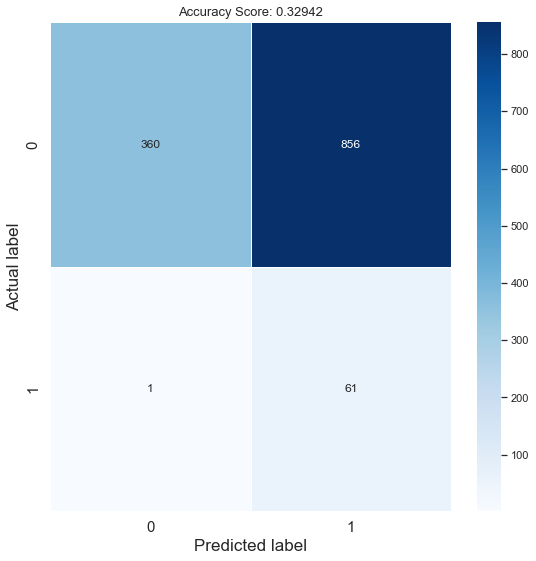

In [77]:
cm = metrics.confusion_matrix(y_test, model_naive.predict(X_test))
plt.figure(figsize=(9,9)) #print out seaborn heatmap of Confusion matrix
sns.heatmap(cm,annot=True,fmt="d", cmap="Blues", linewidths= 1);
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score_naivetest), size = 13);
plt.tick_params(labelsize= 15)

In [78]:
%%time
from sklearn.naive_bayes import BernoulliNB

model_naive = BernoulliNB(binarize=0.1) # binarise is the threshold level setting)
model_naive.fit(X_train, y_train)
y_predict = model_naive.predict(X_test)
score_naive= model_naive.score(X_test, y_test)
score2_naive = model_naive.score(X_train,y_train)  
score_naivetest= round(score_naive,5)
print(f'Score for Test Data      {score_naivetest}')
print(f'Score for Training Data  {round(score2_naive,5)}')

# use Cross Validation always on TRAINING DATA
from sklearn.model_selection import cross_val_score 
score_naivecv = cross_val_score(model_naive, X_train, y_train, cv=5, scoring='f1_macro')  # default scoring of the test data = Accuracy but you can change to other parameters
print("%0.2f Accuracy of Training Data with a standard deviation of %0.2f" % (score_naivecv.mean(), score_naivecv.std())) # mean score and std deviation of score

Score for Test Data      0.57277
Score for Training Data  0.74431
0.73 Accuracy of Training Data with a standard deviation of 0.00
CPU times: total: 188 ms
Wall time: 47.4 ms


In [79]:
# F1 score low, low recall, high precision

print(classification_report(y_predict,y_test)) 

              precision    recall  f1-score   support

           0       0.56      0.99      0.71       686
           1       0.87      0.09      0.17       592

    accuracy                           0.57      1278
   macro avg       0.71      0.54      0.44      1278
weighted avg       0.70      0.57      0.46      1278



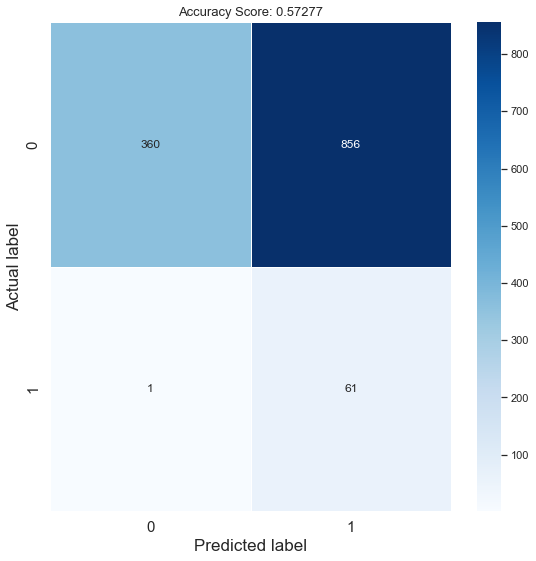

In [80]:
m = metrics.confusion_matrix(y_test, model_naive.predict(X_test))
plt.figure(figsize=(9,9)) #print out seaborn heatmap of Confusion matrix
sns.heatmap(cm,annot=True,fmt="d", cmap="Blues", linewidths= 1);
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score_naivetest), size = 13);
plt.tick_params(labelsize= 15)

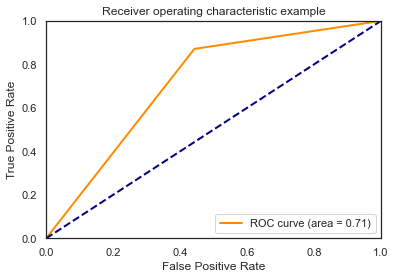

In [81]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
# AUC measures how well a model is able to distinguish between classes

roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()


### GRIDSEARCH

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

lr_gs = GridSearchCV(LogisticRegression(solver = "liblinear" ), lr_params, cv=5, verbose=2, error_score ='raise', scoring='f1_macro' )
lr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10,

GridSearchCV(cv=5, error_score='raise',
             estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='f1_macro', verbose=2)

In [84]:
best_svc = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 10, 'penalty': 'l1'}
0.796766534488391


Score for Test Data      0.74883
Score for Training Data  0.79767
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1216
           1       0.13      0.71      0.22        62

    accuracy                           0.75      1278
   macro avg       0.55      0.73      0.53      1278
weighted avg       0.94      0.75      0.82      1278



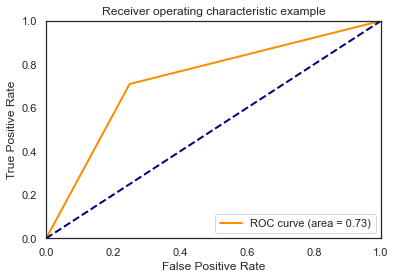

CPU times: total: 812 ms
Wall time: 223 ms


In [86]:
%%time
# F1 score unchanged at 0.22, Recall has gone up, Precision drops


model_lr = LogisticRegression(solver='liblinear',C=10, random_state=0, penalty= 'l2') 
model_lr.fit(X_train, y_train)   
y_predict= model_lr.predict(X_test) 
model_lr.predict_proba(X_test)  

score_lr  = model_lr.score(X_test, y_test) 
score2_lr = model_lr.score(X_train,y_train) 
score_lrtest= round(score_lr,5)
print(f'Score for Test Data      {score_lrtest}')
print(f'Score for Training Data  {round(score2_lr,5)}')

print(classification_report(y_test, y_predict))

from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
# AUC measures how well a model is able to distinguish between classes

roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()


In [ ]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}


In [ ]:
from sklearn.svm import SVC
model_svm = svm.SVC() 
svc= model_svm.fit(X_train, y_train) 

svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5, verbose=2, scoring='f1_macro')
svc_gs.fit(X_train, y_train)

best_svc = svc_gs.best_estimator_
print(svc_gs.best_params_)
print(svc_gs.best_score_)


Score for Test Data      0.75352
Score for Training Data  0.82743
              precision    recall  f1-score   support

           0       0.76      0.98      0.85       937
           1       0.71      0.13      0.22       341

    accuracy                           0.75      1278
   macro avg       0.73      0.55      0.54      1278
weighted avg       0.74      0.75      0.68      1278



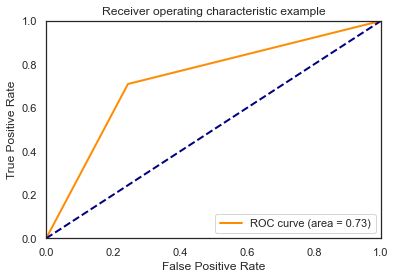

CPU times: total: 10 s
Wall time: 10.1 s


In [87]:
%%time
model_svm = svm.SVC(kernel='rbf', gamma = 0.001, C=100,probability=True) 
svc= model_svm.fit(X_train, y_train) 
 
y_predict= model_svm.predict(X_test) 
model_svm.predict_proba(X_test)  

score_svm= model_svm.score(X_test, y_test) # all classification models use ACCURACY as score
score2_svm = model_svm.score(X_train,y_train) # do a score based on training so you can compare score from Train and Test to check overfitting.
score_svmtest= round(score_svm,5)
print(f'Score for Test Data      {score_svmtest}')
print(f'Score for Training Data  {round(score2_svm,5)}')

print(classification_report(y_predict,y_test))

from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
# AUC measures how well a model is able to distinguish between classes

roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()


### PLOT ROC OF 3 ALGORITHMS

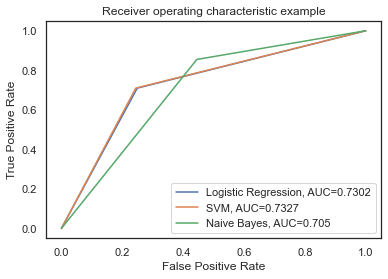

In [88]:
model_log = LogisticRegression(solver='liblinear', random_state=0, penalty= 'l2') # apply the tuned hyperparameters here
model_log.fit(X_train, y_train) 
model_log.predict_proba(X_test)  

y_predictlog= model_log.predict(X_test) 
fpr, tpr, _ = metrics.roc_curve(y_test, y_predictlog)
auclog = round(metrics.roc_auc_score(y_test, y_predictlog), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auclog));


model_svm = svm.SVC(kernel='rbf', gamma = 0.001, C=100,probability=True)  # apply the tuned hyperparameters here we set to true so we can calculate predict.probability to plot ROC even though SVC is not based on probability
model_svm.fit(X_train, y_train) # model learns relationship between X and Y based on Training Data X-train
y_predictsvm= model_svm.predict(X_test) # Based on the model trained, predict the output using Test Data  X-test.  Result is 0 or 1.
fpr, tpr, _ = metrics.roc_curve(y_test, y_predictsvm)
aucsvm = round(metrics.roc_auc_score(y_test, y_predictsvm), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(aucsvm));


model_naive = BernoulliNB()
model_naive.fit(X_train, y_train)
y_predictnaive = model_naive.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_predictnaive)
aucnaive = round(metrics.roc_auc_score(y_test, y_predictnaive), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(aucnaive));

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

plt.legend()

plt.show()

Best Threshold=0.866915, F-Score=0.299
Precision at best F1 score = 0.2923076923076923
Recall at best F1 score    = 0.3064516129032258


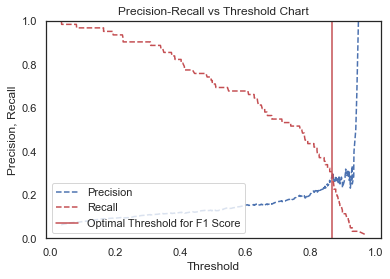

In [89]:
### Predict test_y values and probabilities based on fitted logistic 
#regression model
import numpy as np

y_pred=model_log.predict(X_test) 

probs_y=model_log.predict_proba(X_test) 
# probs_y is a 2-D array of probability of being labeled as 0 (firstcolumn of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 


# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
print(f'Precision at best F1 score = {precision[ix]}')
print(f'Recall at best F1 score    = {recall[ix]}')                                              



#retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.axvline(x = thresholds[ix], color = 'r', label = 'Optimal Threshold for F1 Score')
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1]);

# The Threshold for best F1 score comes with a drastic reduction in RECALL which is not acceptable.